# Unsupervised learning
In unsupervised learning, we are not trying to predict anything. We are trying to find patterns in data. 

One of the main unsupervised techniques is called clustering. One uses clustering when we are trying to explore a dataset, in order to understand the connections between the various rows and columns. For example, one might cluster basketball players based on their statistics. 

Clustering algos group similar rows together. We might find one or more groups in the data, and these groups are called clusters. By doing this, we start to better understand the structure of the data. 

## This tutorial
In this tutorial we will explore clustering on US Senators based on their voting.

In [1]:
# Libraries
import pandas as pd

In [2]:
# Data
votes = pd.read_csv("../../data/114_congress.csv")

In [3]:
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


The number columns are the specific bill which can be voted for. If the bill is voted for, we see 1.0, else 0.0.

## Simple understanding of the data

In [4]:
votes["party"].value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

In [5]:
# If the value is larger than 0.5, the bill is passed and vice versa. 
votes.mean()

00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64

## Finding clusters - euclidean distance

In order to find the groups we need to figure out how close they are. We can do this matematically by calculating the Euclidean distance of the **numerical** columns. 

To find the distance between two rows we use this formula:

$d = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + \ldots + (q_n - p_n)2}$

To compute this distance, we can use the **`euclidean_distance()`** function from the [scikit-learn](http://scikit-learn.org/stable/) library.

In [6]:
from sklearn.metrics.pairwise import euclidean_distances

# Calculate the distance between two rows
euclidean_distances(votes.iloc[0, 3:].values.reshape(1, -1), votes.iloc[1, 3:].values.reshape(1, -1))

array([[ 1.73205081]])

In [7]:
# Simple example of using euclidean_distances
X = [[1, 0], [0, 3]]
euclidean_distances(X)

array([[ 0.        ,  3.16227766],
       [ 3.16227766,  0.        ]])

# K-means (high level)

k-means uses euclidean distances to form clusters. The k-means algo needs the number of clusters a input. It will assign a center to each cluster, and calculate the distances of all points to these centers. The points will be assigned to one cluster or another based on the distance. So simply said:

1. Assign n number of clusters
2. Assign random coords to n centers.
3. Calculate distance from each row to the centers. 
4. Each row will assigned to a cluster based on the distance to the centroids. 
5. Recompute new centers to the clusters. 

Repeat 3-5 until 5 converges, i.e. when the center does not change by more than a specified threshold.

## k-means with the senator data

We assign 2 clusters as we think the senators will fall into either two class, namely republican (R) or democrat (D).

In [8]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=1)

In [9]:
# Fit the model. (OBS: remeber that only numerical values need to be passed as input)
senator_distances = kmeans_model.fit_transform(votes.iloc[:, 3:])

# Show the distances for each senator to the two clusters
senator_distances[0:10]

array([[ 3.12141628,  1.3134775 ],
       [ 2.6146248 ,  2.05339992],
       [ 0.33960656,  3.41651746],
       [ 3.42004795,  0.24198446],
       [ 1.43833966,  2.96866004],
       [ 0.33960656,  3.41651746],
       [ 3.42004795,  0.24198446],
       [ 0.33960656,  3.41651746],
       [ 3.42004795,  0.24198446],
       [ 0.31287498,  3.30758755]])

In [10]:
labels = kmeans_model.labels_
labels

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0])

In [11]:
results = pd.DataFrame({"x": senator_distances[:, 0], "y": senator_distances[:, 1], "labels": labels})
results.head()

,labels,x,y
0,1,3.121416,1.313478
1,1,2.614625,2.053400
2,0,0.339607,3.416517
3,1,3.420048,0.241984
4,0,1.438340,2.968660


In [12]:
votes.party.value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

In [13]:
pd.crosstab(labels, votes["party"], colnames=["Party"], rownames=["Cluster"])

Party,D,I,R
Cluster,,,
0,41,2,0
1,3,0,54


In [14]:
# Democratic outliers
democratic_outliers = votes[(labels == 1) & (votes["party"] == "D")]
democratic_outliers

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [15]:
# Visualize the distances
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_style("whitegrid")
sns.set_palette("colorblind")


from matplotlib import rcParams

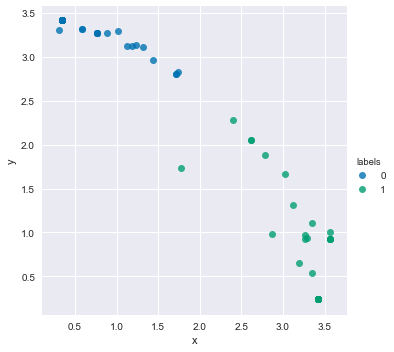

In [16]:
sns.lmplot(x="x", y="y", data=results, hue="labels", fit_reg=False)

In [17]:
# Find the most extreme by cubing the distances
cubed_distances = senator_distances[:, 0]**3 + senator_distances[:, 1]**3
votes["cluster"] = labels
votes["extremism"] = cubed_distances
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,cluster,extremism
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,32.678748
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,26.532323
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0,39.918781
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,40.017540
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,29.138297


In [18]:
# The ten most farthest away from centers. 
votes.sort_values(by="extremism", ascending=False).head(10)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,cluster,extremism
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,46.250476
53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,46.046873
69,Paul,R,KY,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,46.046873
80,Sasse,R,NE,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,46.046873
26,Cruz,R,TX,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,46.046873
48,Johnson,R,WI,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,40.017540
47,Isakson,R,GA,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,40.017540
65,Murkowski,R,AK,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,40.017540
64,Moran,R,KS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,40.017540
30,Enzi,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,40.017540
